In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../python/')
import NGC5533_functions as nf
import noordermeer as noord
import dataPython as dp

import astropy.units as u
import astropy.constants as c

# Disk model from Casertano's equations

A disk model was calculated and plotted, using "Rotation Curve of the Edge-On Spiral Galaxy NGC 5907: disk and halo masses" paper by Stefano Casertano (1983). 
<br>
In the first step, we calculated the <b>density distribution</b> (eq.2), and rho0(r) was determined by the piecewise function (eq.3). Then the <b>partial derivative of the density distribution</b> was taken with respect to u (which we assumed is the same as r). The density should go to zero beyond R+delta = 37.38 kpc according to the piecewise function which we checked by plotting and printing the values for both the density and the partial derivative. We used the equation in Casertano's paper (eq.4) to find the <b>radial force</b> and found the <b>velocity</b> of the disk (eq.6). The final result was plotted and is seen below. 

## Plot of the disk model

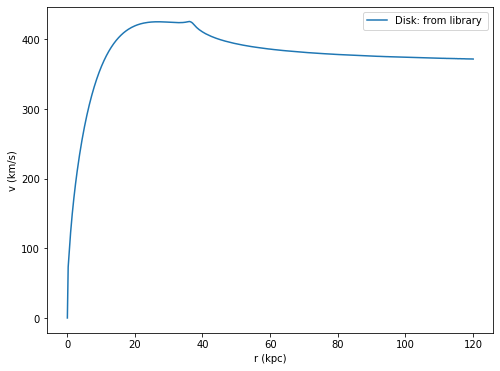

In [2]:
r = np.linspace(0.1,120,500)
plt.figure(figsize=(8,6))
plt.plot(r,nf.d_v(r,1,nf.h_c,nf.drho00_c,load=True,path='../fitting/'),label='Disk: from library ')
plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.legend()
plt.show()

## Parameters

The parameters found for the disk are listed below. <br>
(There is a handy tool in astropy to convert units and to use constants which can be utilized in converting the parameters.)
<br><br>

<b>Gravitational constant</b> was converted to [kpc $*$(km/s)^2 $/$ solar mass] to match all other units. <br><br>

<b>Radial scale-length</b> was mentioned a few times in Noordermeer's paper: <br> 
"_The stellar mass distribution in early-type disc galaxies: surface photometry and bulge–disc decompositions_" paper mentioned disc scalelength in arcseconds: 34.4 arcseconds (pg.1499), same paper mentions hR = 8.9 kpc as disk scalelength (pg.1494). The arcseconds from this paper were converted to kpc using the galaxy's distance of 54.3 Mpc from the same paper and resulted in 9.1 kpc.<br>
"_The mass distribution in early-type disc galaxies: declining rotation curves and correlations with optical properties_" paper mentions R-band disc scalelength of 9.1 kpc (pg.1515). <br><br>

<b>Disk surface density</b>: Casertano's equations (eq.2 & eq.3) contains a rho00 which is not fully explained other than "the central surface density mu0 = 2$*$rho00$*$z0." This parameter is not mentioned or explained later in his paper. Noordermeer doesn't provide this value anywhere or we're still looking for it. He does provide the halo surface density in the original paper and we were using this instead. This is only a scaling factor and doesn't affect the shape of the curve. <font color="red"> <b> Still searching for this value! </b></font><br><br>

<b>Mass-to-Light ratio of disk</b>: This value is a scaling factor from Noordermeer's _Rotation curves of flattened sersic bulges_ paper. The prefactor used in our equations is

\begin{equation}
\Upsilon_d \cdot \frac{L_{d,R}}{\int_0^{\infty} rdr \int_{-\infty}^{\infty} dz \rho(r,z)}
\end{equation}

Where *L<sub>d,R</sub>* is the luminosity, *&Upsilon;<sub>d</sub>* is the assumed mass-to-light ratio, and the integral is the mass *M*. If the prefactor is 1, then we have assumed the correct mass-to-light ratio. Therefore, we can find the correct mass-to-light ratio using:

\begin{equation}
\frac{\Upsilon_d \cdot}{\Upsilon_{real}} = \frac{p}{1}
\end{equation}

Where *p* is the prefactor used in the numeric calculation. (The same luminosity and mass are used throughout the calculation, so they cancel themselves out.) We can therefore write:

\begin{equation}
\Upsilon_d \cdot = p*\Upsilon_{real}
\end{equation}

Which gives us the value of the mass-to-light ratio based on a fitted or chosen prefactor.

<b>Parameters depending on the scalelength</b>: <br>
<b>z0</b> is the half-thickness of the disk (Casertano). We assumed this is the same as what Noordermeer calls vertical scaleheight. He defines: "vertical scaleheight of one-fifth of the stellar disc scalelength" (Noordermeer pg.1363). Casertano also defines: "assumed half-thickness z0=0.2h" (Casertano pg.739).<br>
<b>R</b> is the cutoff radius, not mentioned by Noordermeer but Casertano, he defines: "R=4h" (Casertano pg.738)<br>
<b>delta</b> is the cutoff length, not mentioned by Noordermeer but Casertano, he defines: "delta=0.2h" (Casertano pg.738)<br>
<br><br>

In [3]:
#Parameters for Galaxy NGC 5533

G = c.G                       #gravitational constant 
G = G.to((u.kpc * (u.km / u.second)**2) / (u.solMass))      # converting to (kpc*(km/s)^2/solar mass)
print("Gravitational constant is {}.".format(G))

# From Noordermeer's The stellar mass distribution in early-type disc galaxies: 
                   # surface photometry and bulge–disc decompositions
# hR (R band scale length)    
h = 8.9 * u.kpc               #radial scale-length (kpc)

# same paper, different value
h_arcsec = 34.4 * u.arcsec
D = 54.3 * u.Mpc
h_Mpc = (h_arcsec.to(u.degree)/(360 * u.degree)) * 2 * np.pi * D
h_kpc = h_Mpc.to(u.kpc)
print("Radial scalelength is {}.".format(h_kpc))

# still searching for this value
rho00 = 0.31e9                #central surface density (solar mass/kpc^2) - using halo density for now

# From Noordermeer's Rotation curves of flattened sersic bulges
epsdisk = 5.0                 #mass-to-light ratio disk

# Parameters depending on scale-length, from Noordermeer and Casertano
z0 = 0.2*h                    #half-thickness (kpc) (Noordermeer & Casertano)
R = 4*h                       #cut-off radius (kpc) (Casertano)
d = 0.2*h                     #cut-off length upper limits (kpc) (Casertano)

Gravitational constant is 4.300917270069976e-06 km2 kpc / (s2 solMass).
Radial scalelength is 9.055931712181243 kpc.


## Equations



>__Density Distribution__: <br>
    \begin{equation}
    \rho(r,z) = \rho_0(r)\left[\cosh\left(\frac{z}{z_0}\right)\right]^{-2}
    \end{equation}<br>
    and:
    \begin{equation}
    \rho_0(r) = 
    \begin{cases}
    \rho_{00}(r)e^{-\frac{r}{h}}       & \quad \text{if } r\leq R \\
    \rho_{0}(R)\left[1-\frac{r-R}{\delta}\right]       & \quad \text{if } R<r\leq R+\delta \\
    0       & \quad \text{if } r > R+\delta \\
  \end{cases}
\end{equation}
    <br>
>where:<br>
    $\rho_{00}$ = central density<br>
    $h$ = radial scale length<br>
    $R$ = cut-off radius<br>
    $\delta$ = cut-off length upper limits<br>
    $z_0$ = half-thickness<br>
    
>__Gravitational Force__: <br>
    \begin{equation}
    F_{rd}(r) = 4\pi G \int_{0}^{\infty} u  du \int_{0}^{\infty} dz \left[\frac{\partial\rho(u,z)}{\partial u}\right] 2 \frac{\mathscr{K}(p)-\mathscr{E}(p)}{\pi\sqrt{rup}} 
    \end{equation}<br>
>where:<br>
        $\mathscr{K}$ and $\mathscr{E}$ = complete elliptic integrals<br>
        $G$ = gravitational constant<br>
>and:<br>
>\begin{equation}
   x = \frac{r^{2}+u^{2}+\xi^{2}}{2ru}
   \end{equation}<br>
   \begin{equation}
   p = x - \sqrt{x^{2}-1}
   \end{equation}<br>
    
>__Velocity__: <br>
    <font color="green">
    \begin{equation}
    V_{D}^{2}(r) = -rF_{rd}(r)
    \end{equation}<br></font>

## Comparison

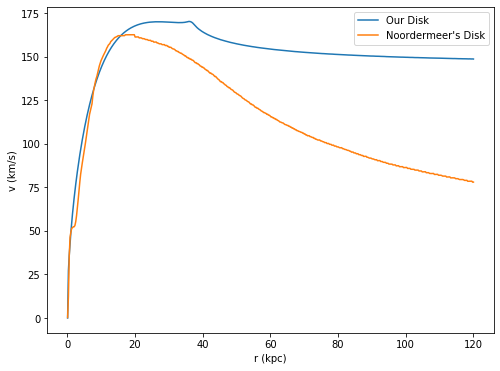

In [4]:
plt.figure(figsize=(8,6))
plt.plot(r,0.4*nf.d_v(r,1,nf.h_c,nf.drho00_c,load=True),label='Our Disk')
plt.plot(r,noord.noord_disk(r),label="Noordermeer's Disk")
plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.legend()
plt.show()

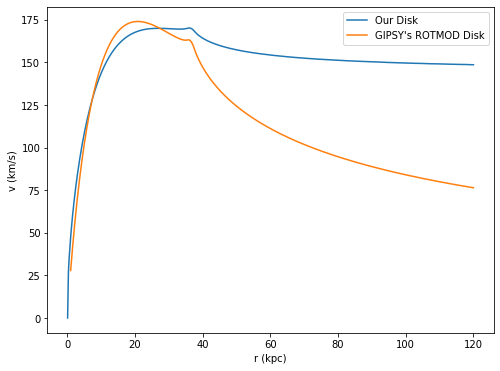

In [5]:
gdata = dp.getXYdata('../fitting/data/final/nord-120kpc-disk-gipsy.txt') #data from GIPSY
rdat = np.asarray(gdata['xx']) #radius values
gvel = np.asarray(gdata['yy']) #velocities from GIPSY
#cvel = nf.d_v(rdat,pref=0.4,path='fitting')  #calculated velocities

plt.figure(figsize=(8,6))
plt.plot(r,0.4*nf.d_v(r,1,nf.h_c,nf.drho00_c),label='Our Disk')
plt.plot(rdat,gvel,label="GIPSY's ROTMOD Disk")
plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.legend()
plt.show()

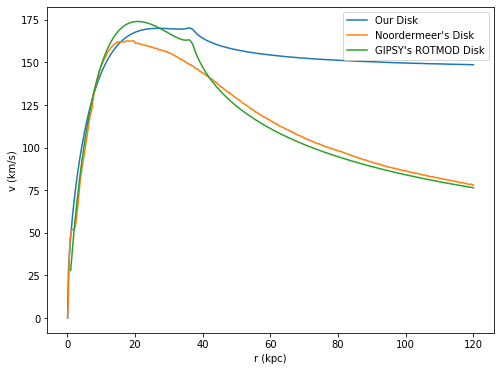

In [6]:
plt.figure(figsize=(8,6))
plt.plot(r,0.4*nf.d_v(r,1,nf.h_c,nf.drho00_c,load=True),label='Our Disk')
plt.plot(r,noord.noord_disk(r),label="Noordermeer's Disk")
plt.plot(rdat,gvel,label="GIPSY's ROTMOD Disk")
plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.legend()
plt.show()